### Lake Taupo

**Station Name:** tgho 

**Location:** North Island, New Zealand

**Archive:** [Geonet](https://www.geonet.org.nz/)

**DOI:**  	N/A

**Ellipsoidal Coordinates:**

- Latitude: -38.813

- Longitude: 175.996

- Height: -38.813 m

[Station Page at Geonet](https://www.geonet.org.nz/data/network/mark/TGHO)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/TGHO.sta)

[Google Map Link](https://goo.gl/maps/1zmgi6rRHPVPDAfV8)

<p align="center">
<img src="../../../docs/_static/tgho_barker.jpg" width="500"><BR>
Photo credit: Simon Barker
</P>

### Data Summary

Station tgho is operated by GNS in new zeland and the site site is located 
on a platform in Lake Taupo, New Zealand. It records standard GPS and Glonass signals at a low sample rate of 30 sec.

### Imports

In [1]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


**Fast Mode:** 
this will download data weekly instead of daily

In [2]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

### Take a Quick Look at the Data

We will begin like always by making an **SNR** file. Here we will use both GPS and Glonass and we'll set the archive to nz

Using GBM orbit archived at CDDIS
tgho  year: 2020  doy: 300 from:  nz
sp3 filename  gbm21291.sp3
/gps/products/mgex/2129/ GFZ0MGXRAP_20203000000_01D_05M_ORB.SP3.gz
/gps/products/2129/ GFZ0MGXRAP_20203000000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20203000000_01D_05M_ORB.SP3
https://data.geonet.org.nz/gnss/rinex/2020/300/tgho3000.20o.gz
100% [..........................................................................] 1727471 / 1727471
 File has been found  tgho3000.20o.gz


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/tgho/tgho3000.20.snr66
That took  46.16  seconds
Feedback written to subdirectory logs
minimum elevation angle (degrees) for this dataset:  0.0233
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/quickLook_summary.png


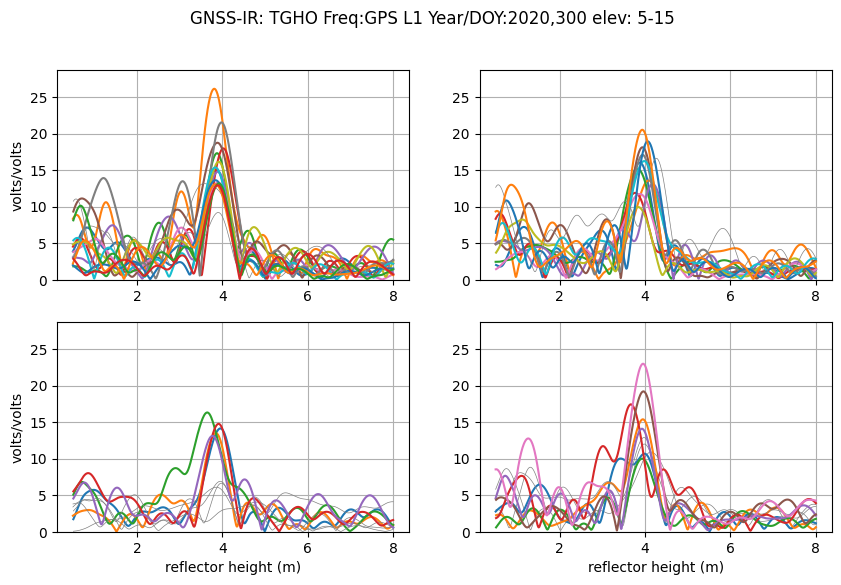

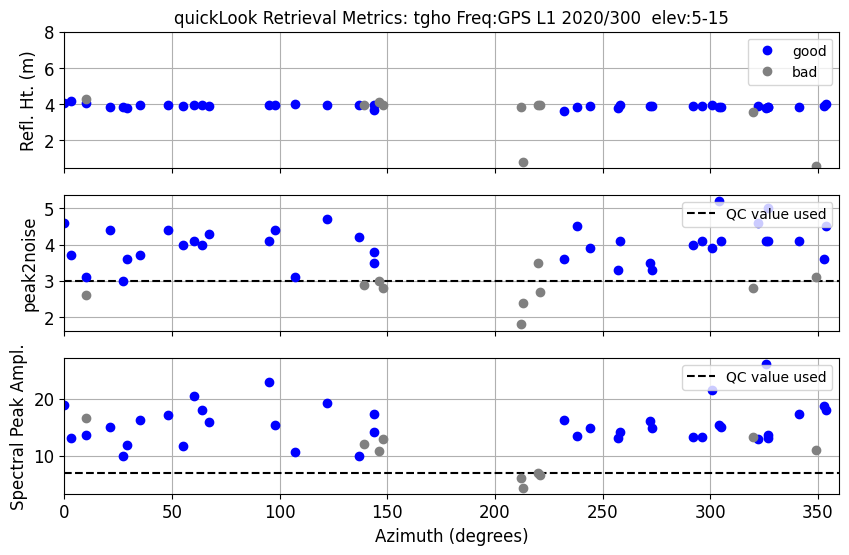

In [3]:
station = 'tgho'
# picking a year and day of year
year=2020
doy=300

rinex2snr('tgho', year, doy, orb='gnss', archive='nz')

values, metrics = quicklook(station, year, doy)

 Using the default elevation angles is likely combining water and pier reflections so we will try restricting the close reflections (from the pier) by using a larger lower bound. Let's compare the defaults with 5-15 degrees elevation angles instead of 5-25 to see if this improves the retrievals.

In [ ]:
values, metrics = quicklook(station, year, doy=doy, e2=15)

This does look better. It's possible that the clutter near the monument produces noise at the smaller RH values. A better result can be found if those values are eliminated by setting heights from 2 through 8. (note: default e1=5 and h2=8 so we don't need to set them in the code)

In [ ]:
values, metrics = quicklook(station, year, doy, e2=15, h1=2)

We'll keep in mind from the qc plots here that we'll probably choose our amplitude to be ~9 and our peak to noise ratio to 3.

Now let's try looking at the periodograms for L2:

In [ ]:
values, metrics = quicklook(station, year, doy=doy, e1=5, e2=15, h1=2, h2=8, fr=2)

This shows us that we will not use L2 data in the analysis.

Next, we'll look at the Glonass frequencies:101 (L1) and 102 (L2)

In [ ]:
values, metrics = quicklook(station, year, doy=doy, e1=5, e2=15, h1=2, h2=8, fr=101)


In [ ]:
values, metrics = quicklook(station, year, doy=doy, e1=5, e2=15, h1=2, h2=8, fr=101)

values, metrics = quicklook(station, year, doy=doy, e1=5, e2=15, h1=2, h2=8, fr=102)

We should exclude 135-225 degrees in azimuth as there is an empty region as well as a few poor retreivals.

A windy day could cause bad retrievals.  For days with no wind, we would have large amplitudes - and for very windy days it could look like this:

tgho  year: 2020  doy: 273 from:  nz
Requested a GPS only nav file
100% [..............................................................................] 73843 / 73843found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/nav/auto2730.20n
https://data.geonet.org.nz/gnss/rinex/2020/273/tgho2730.20o.gz
100% [..........................................................................] 1678721 / 1678721
 File has been found  tgho2730.20o.gz


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/tgho/tgho2730.20.snr66
That took  14.67  seconds
Feedback written to subdirectory logs
minimum elevation angle (degrees) for this dataset:  0.0001
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/quickLook_summary.png


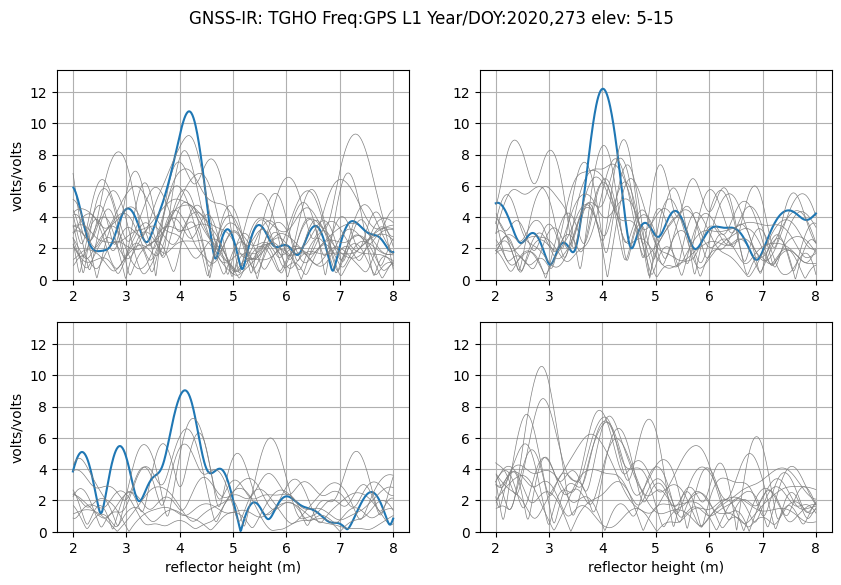

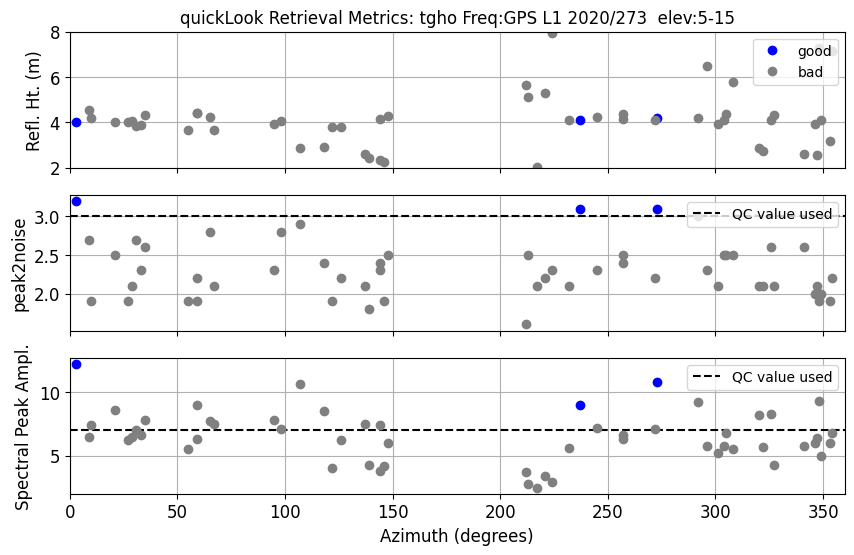

In [4]:
year=2020
doy=273 #sep 29 was a very windy day

rinex2snr(station=station, year=year, doy=doy, archive='nz')

values, metrics = quicklook(station, year=year, doy=doy, e1=5, e2=15, h1=2, h2=8)

### Analyze the Data
Here we'll set the values we discussed as variables and will pass them into the `make_gnssir_input` function.
We will exclude 135-225 degrees in azimuth. We will require an amplitude of 9 and a peak to noise ratio of 3.0
and specify L1 and glonass signals (frequencies 101 and 102).

In [6]:
min_elevation_angle = 5
max_elevation_angle = 15
peak_to_noise = 3
amplitude = 9
min_height = 2
max_height = 8
azimuths = [0,135,225,380]
frequencies = [1,101,102]

make_gnssir_input(station, e1=min_elevation_angle, e2=max_elevation_angle,
                       peak2noise=peak_to_noise, ampl=amplitude, h1=min_height, h2=max_height, azlist2=azimuths, frlist=frequencies)


Assume you want to use the UNR database.
Implementing user-provided frequency list.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/tgho.json


Now we would run rinex2snr for about six months in 2020 and then run gnssir for the same dates.

In [7]:
# get snr (let's use GFZ orbits, which is multi-GNSS setting orb='gnss')
rinex2snr(station, year, doy=130, doy_end=319, orb='gnss', archive='nz', weekly=weekly.value)

Using GBM orbit archived at CDDIS
You have invoked the weekly option
tgho  year: 2020  doy: 130 from:  nz
sp3 filename  gbm21046.sp3
/gps/products/mgex/2104/ GFZ0MGXRAP_20201300000_01D_05M_ORB.SP3.gz
/gps/products/2104/ GFZ0MGXRAP_20201300000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20201300000_01D_05M_ORB.SP3
https://data.geonet.org.nz/gnss/rinex/2020/130/tgho1300.20o.gz
100% [..........................................................................] 1784556 / 1784556
 File has been found  tgho1300.20o.gz


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/tgho/tgho1300.20.snr66
tgho  year: 2020  doy: 137 from:  nz
sp3 filename  gbm21056.sp3
/gps/products/mgex/2105/ GFZ0MGXRAP_20201370000_01D_05M_ORB.SP3.gz
/gps/products/2105/ GFZ0MGXRAP_20201370000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20201370000_01

Now run gnssir:


In [8]:
gnssir(station, year, doy=130, doy_end=319)

{'station': 'tgho', 'lat': -38.812860185, 'lon': 175.99633087, 'ht': 385.9895671, 'minH': 2, 'maxH': 8, 'e1': 5, 'e2': 15, 'NReg': [2, 8], 'PkNoise': 3, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [0, 135, 225, 380], 'freqs': [1, 101, 102], 'reqAmp': [9, 9, 9], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'tgho_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1, 101, 102]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [0, 135, 225, 380]
Using azimuths:  [0, 135, 225, 380]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/tgho_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file should be stored here: /Users/kellyenloe/EarthScope/gn

To look at daily averages, use the utility <code>daily_avg</code>. The median filter is set to allow values within 0.25 meters of the 
median, and the minimum number of tracks required to calculate the average we will set to 50 tracks. We can also set our own name for the daily average file.

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_allRH.txt 

A total of  29  days were evaluated.
6  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/t

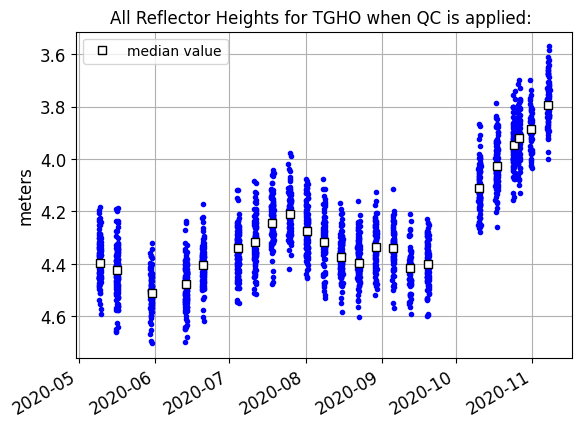

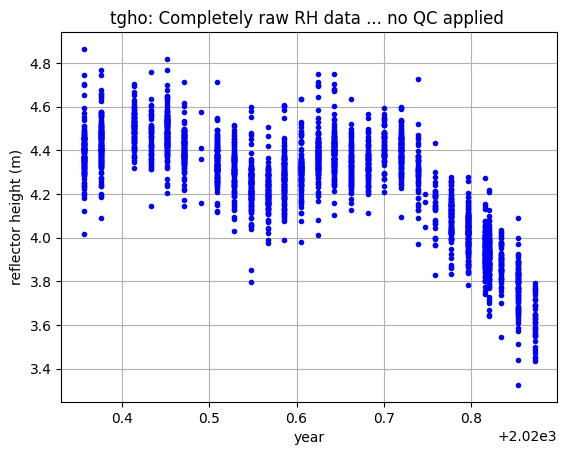

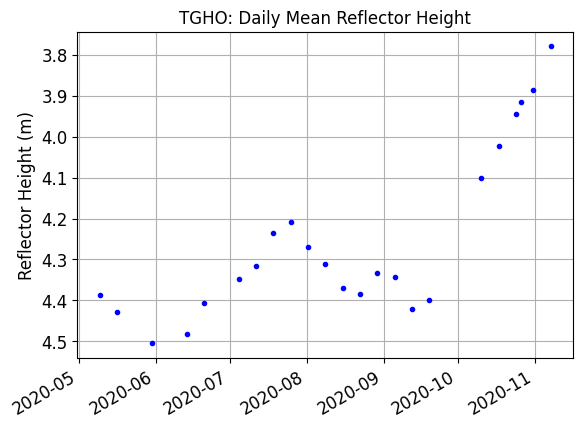

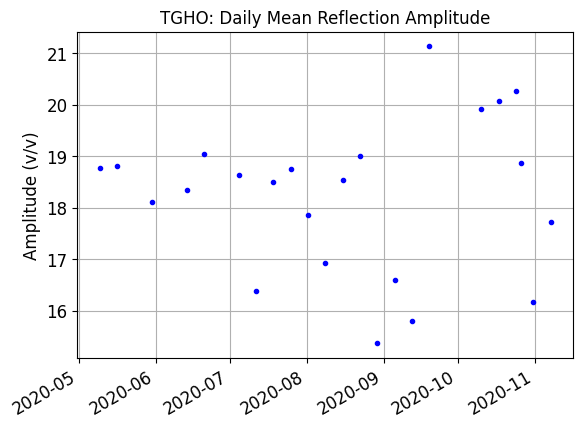

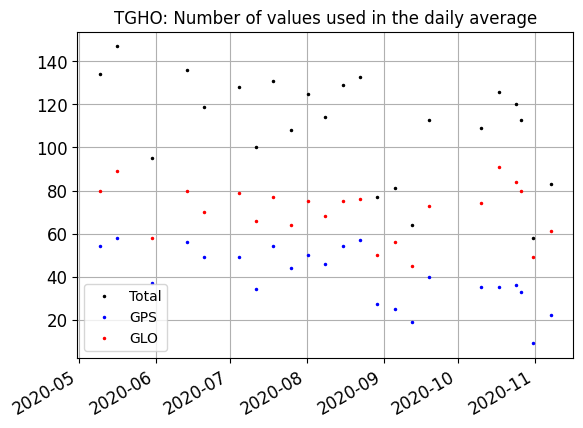


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/tgho/tgho_dailyRH.txt


In [9]:
daily_avg(station, medfilter=.25, ReqTracks=50)

and now we can see the reflector heights for these 6 months in 2020.

We'll note that there are quite a few data outages in this series, which means the RINEX files were missing from the NZ archive.

Although Taupo is in a volcanic caldera, lake levels are determined by seasonal processes such 
as evaporation, precipitation, input from local drainages, and outflow. The Waikoto 
River is sole river draining the lake, and river flow is regulated by a series of hydroelectric dams.